In [1]:
import numpy as np
import pypianoroll
from pypianoroll import Multitrack, Track
from matplotlib import pyplot as plt
import pretty_midi
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)

import pygame
import os
import pickle


%matplotlib inline

import matplotlib

import seaborn as sns


pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
# Parse a MIDI file to a `pypianoroll.Multitrack` instance

multitrack = Multitrack('./rock.mid')
#print (multitrack.tracks[0])
for idx, track in enumerate(multitrack.tracks):
    pianoroll = track.pianoroll


print (multitrack.beat_resolution,)
num_track = len(multitrack.tracks)
downbeats = multitrack.get_downbeat_steps()
print (downbeats,num_track)

24
[0] 1


In [3]:
# drum had only 47 keyname. For details https://www.midi.org/specifications/item/gm-level-1-sound-set

pianoroll_drum = np.asarray([ pianoroll[i][35:82] for i in range(0,pianoroll.shape[0]) ])
print (pianoroll_drum.shape)



(5664, 47)


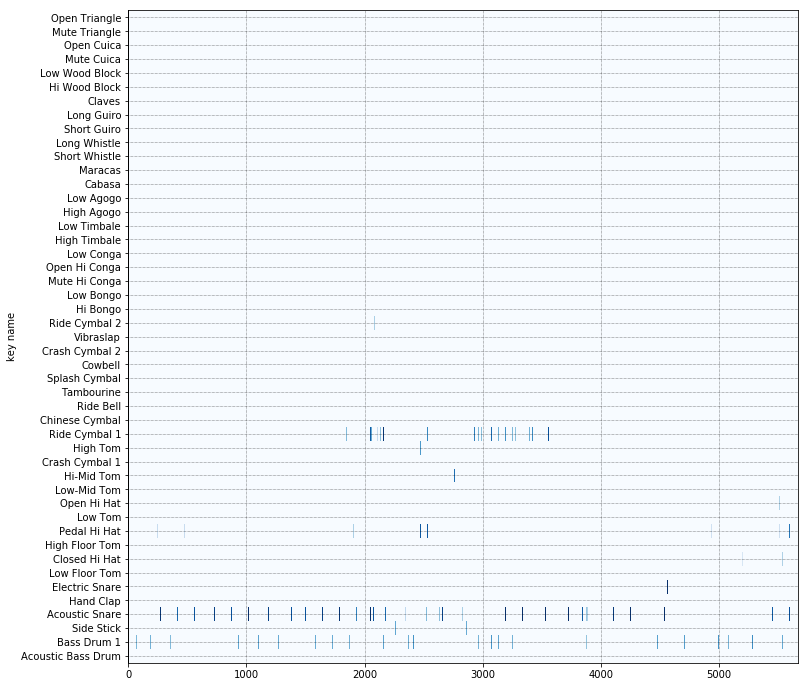

In [4]:
def plot_drum(q):
    fig, ax = plt.subplots(figsize=(12,12))
    axs = [ax]
    ax.set_yticks(np.arange(0,47))
    drum_label = [pretty_midi.note_number_to_drum_name(i) for i in range(128)]
    ax.set_yticklabels( drum_label[35:82])
    ax.set_ylabel("key name")
    ax.grid(
                axis="both", color="k", linestyle=":", linewidth=0.5
            )
    for step in downbeats:
        ax.axvline(x=step, color="k", linewidth=1)

    to_plot = q.T
    ax.imshow(
                to_plot,
                cmap='Blues',
                aspect="auto",
                vmin=0,
                vmax=127,
                origin="lower",
                interpolation="none",
            )


    fig.show()
    
plot_drum(pianoroll_drum)
    

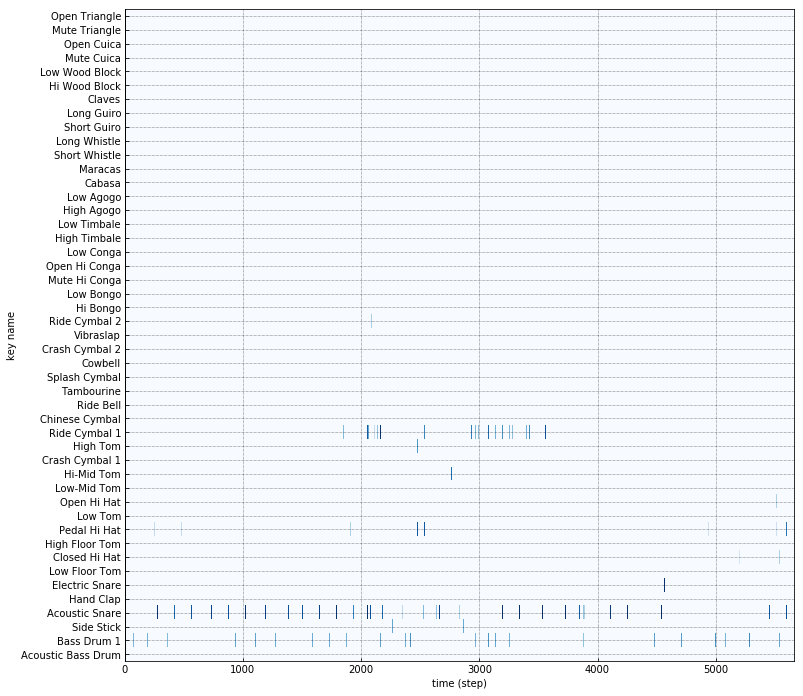

In [9]:
#fig, ax = plt.subplots()
fig, ax = plt.subplots(figsize=(12,12))
axs = [ax]
cmaps = ("Blues", "Greens")
pypianoroll.plot_pianoroll(
                axs[0],
                pianoroll_drum,
                True,
                24,
                downbeats,
                preset="default",
                cmap=cmaps[0 % len(cmaps)],
                xtick="step",
                            ytick="pitch", 
                            yticklabel="name"
            )

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(<Figure size 3240x6624 with 1 Axes>,
 [<matplotlib.axes._subplots.AxesSubplot at 0x7f6cf073ad68>])

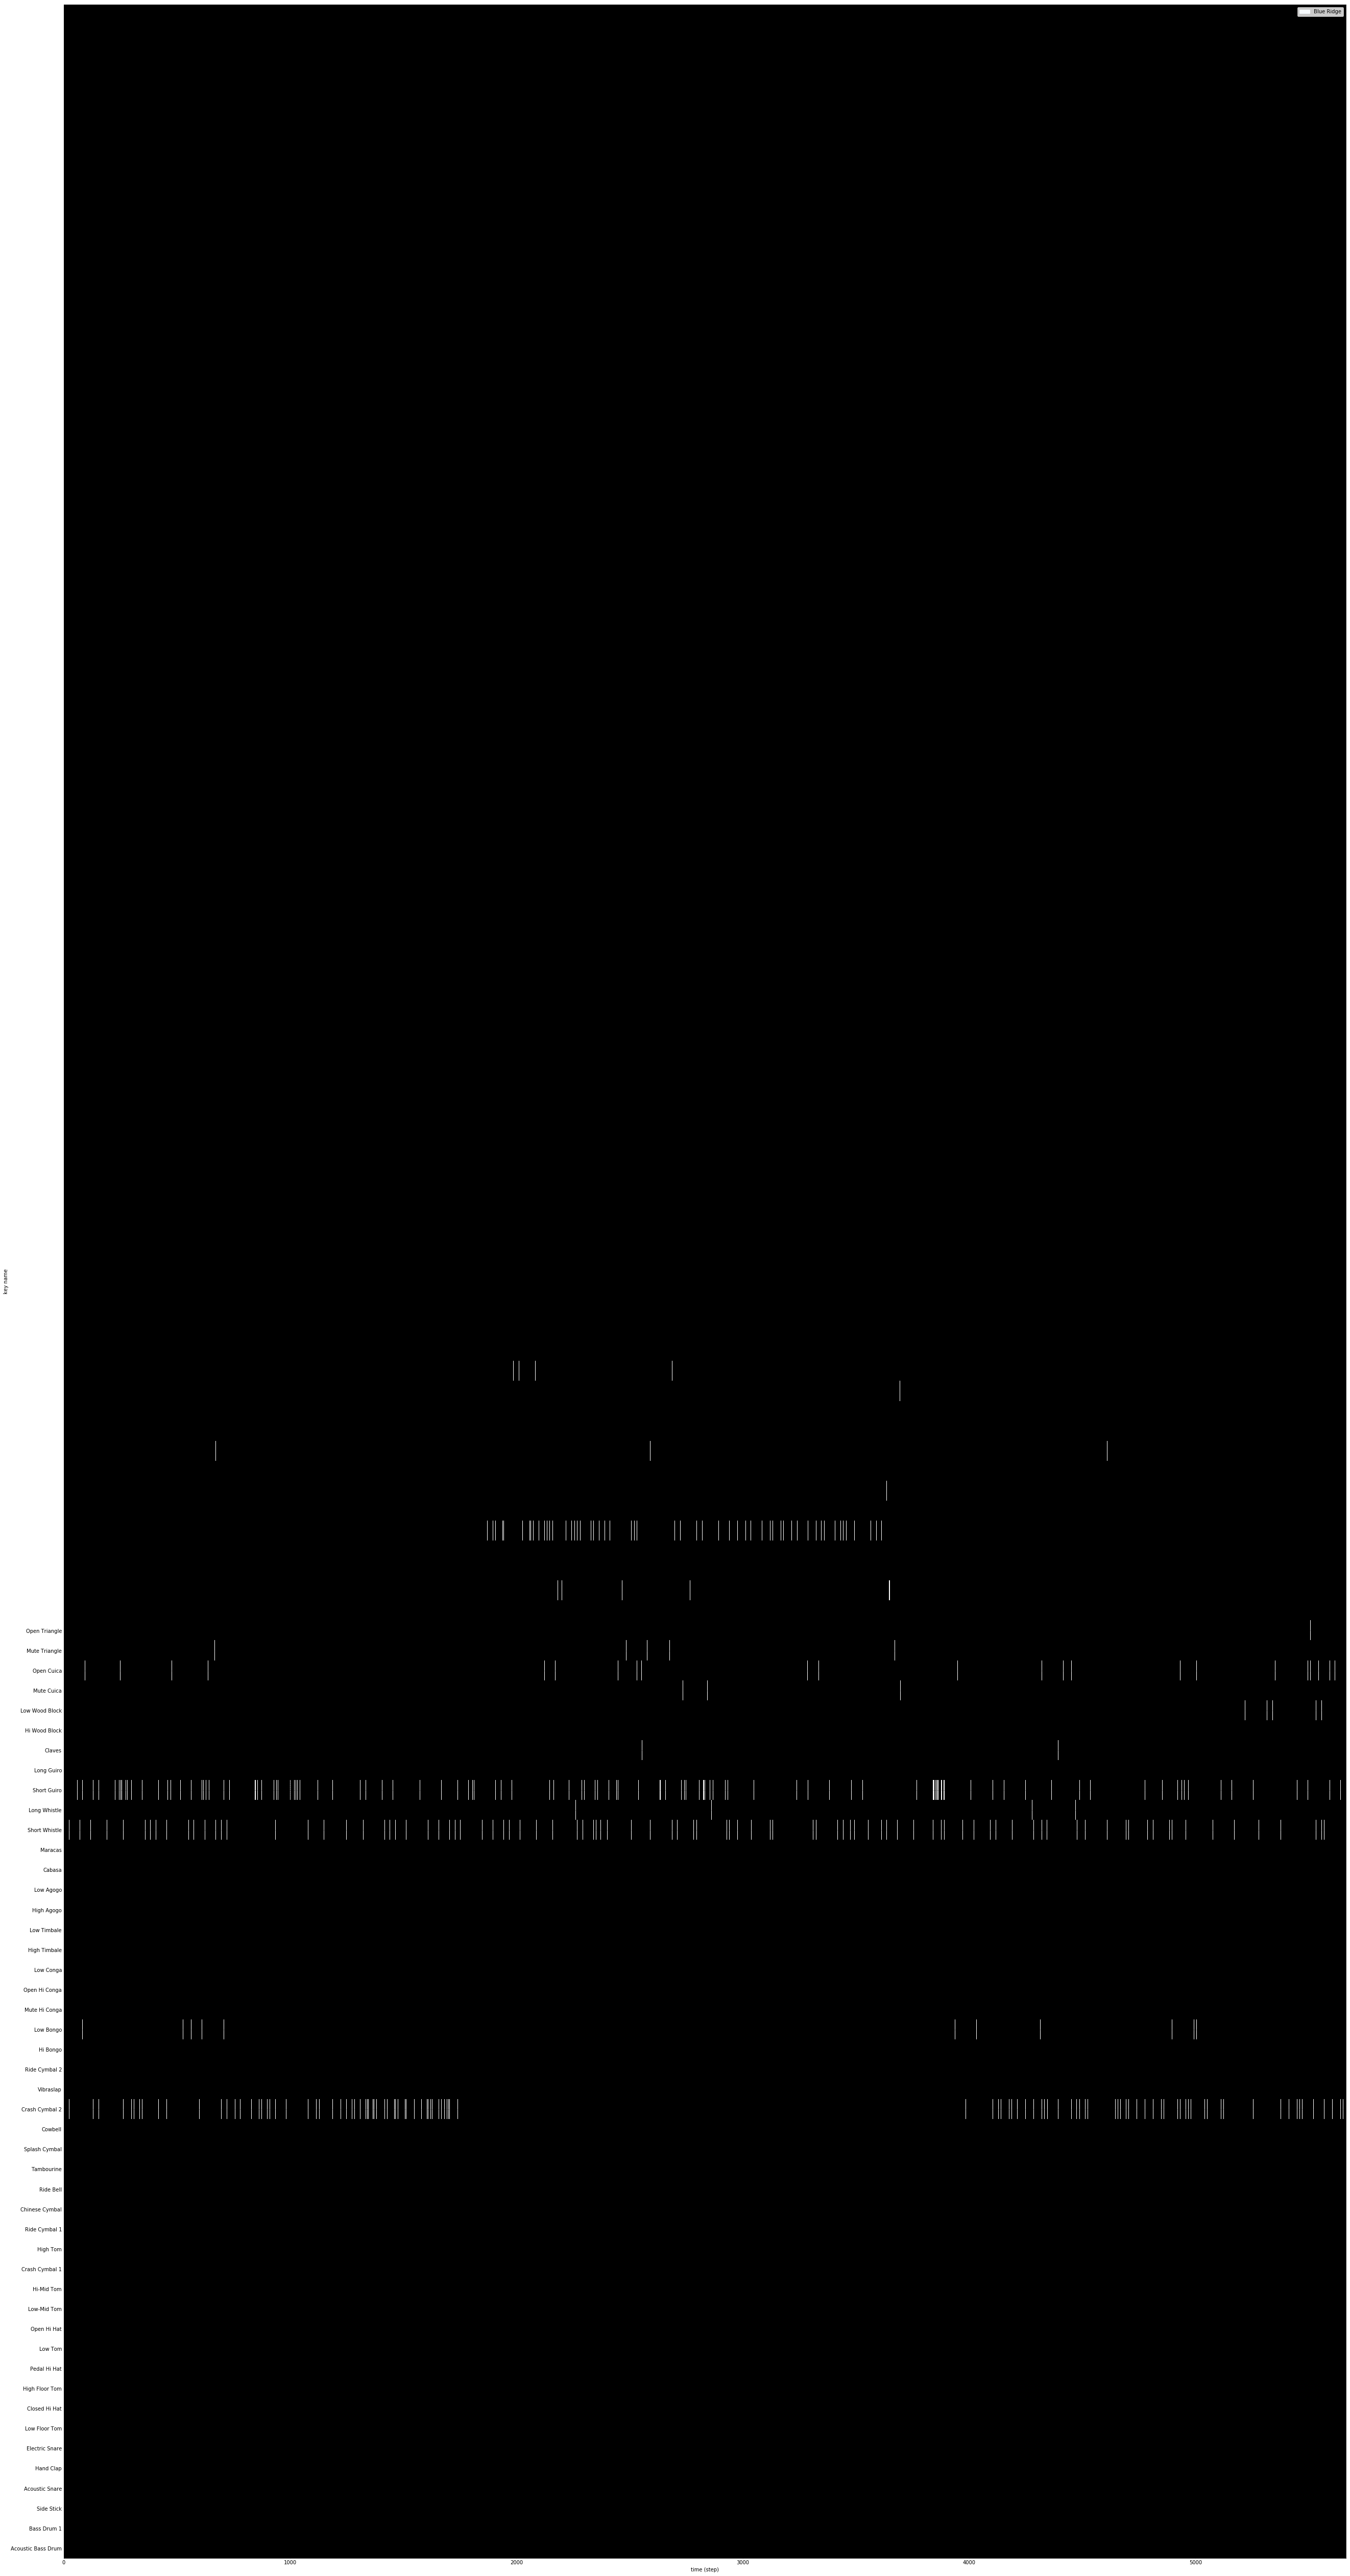

In [11]:
pypianoroll.plot_multitrack(multitrack,filename='./rock.pdf', mode="stacked", cmaps=['Blues'], xtick="step",
                            ytick="pitch", 
                            yticklabel="name")



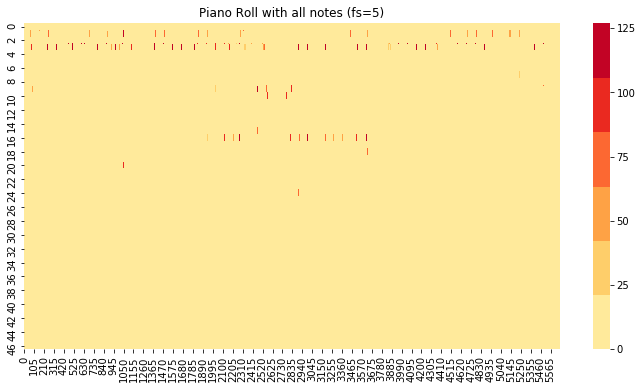

In [6]:
plt.subplots(figsize=(12,6))
sns.heatmap(pianoroll_drum.T, cmap = sns.color_palette("YlOrRd"))
plt.title("Piano Roll with all notes (fs=5)")
plt.show()

In [7]:
pypianoroll.save_animation(
    'ani.gif',
    pianoroll_drum,
    100,hop=100,
    fps=12)

t:  10%|█         | 5/48 [00:00<00:01, 38.21it/s, now=None]

MoviePy - Building file ani.gif with imageio.
